<a href="https://colab.research.google.com/github/Qcritt/cosc470s24/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kartoone/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 80 (delta 11), reused 5 (delta 1), pack-reused 55
Receiving objects: 100% (80/80), 16.44 MiB | 12.88 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/nn


In [2]:
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

In [3]:
import numpy as np
print(np.shape(training_data[0][0]))
print(np.shape(training_data[0][1]))
print(training_data[0][1])

(784, 1)
(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [4]:
# average digit darkness
# step 1 - write a function that can calculate the darkness of a single image
def image_darkness(imgpixeldata):
  darkness_total = 0
  for x in imgpixeldata:
    darkness_total = darkness_total + x
  return darkness_total[0]

# step 2 - call that function on all the training images and calculate the average darkness of each digit
darkness = image_darkness(training_data[0][0])
whichimage = np.argmax(training_data[0][1])
print(f"The first image was a {whichimage} and its darkness was {darkness}")
darkness = image_darkness(training_data[1][0])
whichimage = np.argmax(training_data[1][1])
print(f"The second image was a {whichimage} and its darkness was {darkness}")

# define a 10-element list of darkness totals
darkness_totals = [0 for _ in range(10)]
# define a 10-elment list of digit counts
darkness_counts = [0 for _ in range(10)]
#there are 10 elements in the array because the 10 output nodes correspond to the 10 possible digits we are returning. Each digit has a different average darkness


# iterate through each image and update the two data structures
for training_img in training_data:
  darkness = image_darkness(training_img[0])
  whichimage = np.argmax(training_img[1])
  darkness_totals[whichimage] += darkness
  darkness_counts[whichimage] += 1

# now calculate the averages
darkness_averages = [darkness_totals[i]/darkness_counts[i] for i in range(10)]

print(darkness_counts)
print(darkness_averages)

# step 3 - use those averages to classify all the test data images and count how many of each digit you get right
def find_closest(darkness, darkness_averages):
  differnces = np.abs(darkness_averages - darkness)
  return np.argmin(differnces)

correct_counts = [0 for _ in range(10)]
wrong_counts = [0 for _ in range(10)]

for imgdata, whichimage in test_data:
  darkness = image_darkness(imgdata)
  # see which darkness_average is closest to "darkness" and make that our classification for this image
  closest_digit = find_closest(darkness, darkness_averages)
  if closest_digit == whichimage:
    correct_counts[whichimage] += 1
  else:
    wrong_counts[whichimage] += 1

# now that we have our correct/wrong counts, turn that into accuracies
digit_accuracies = [correct_counts[i]/(correct_counts[i]+wrong_counts[i]) for i in range(10)]
print(digit_accuracies)



The first image was a 5 and its darkness was 107.51953125
The second image was a 0 and its darkness was 121.46484375
[4932, 5678, 4968, 5101, 4859, 4506, 4951, 5175, 4842, 4988]
[135.8691200324412, 59.66034750352237, 116.294303857186, 110.87092451235051, 95.22073970338548, 100.34646166222814, 107.38312020298929, 89.8788345410628, 117.88056410703221, 96.0455585592923]
[0.5418367346938775, 0.8290748898678414, 0.04844961240310078, 0.048514851485148516, 0.048879837067209775, 0.0795964125560538, 0.06576200417536535, 0.28793774319066145, 0.13655030800821355, 0.04261645193260654]


In [5]:
# part 2 - use this default configuration and the following hyper-parameters
#    epochs - 30
#    batch size - 10
#    learning rate - 3.0
net = network.Network([784, 30, 10])
net.SGD(training_data, 10, 10, 3.0, test_data=test_data)

Epoch 0 : 9082 / 10000
Epoch 1 : 9236 / 10000
Epoch 2 : 9297 / 10000
Epoch 3 : 9259 / 10000
Epoch 4 : 9336 / 10000
Epoch 5 : 9353 / 10000
Epoch 6 : 9387 / 10000
Epoch 7 : 9358 / 10000
Epoch 8 : 9404 / 10000
Epoch 9 : 9411 / 10000


In [6]:
import numpy as np
a = net.feedforward(test_data[2][0])
print(a)
print(np.argmax(a))
print(test_data[2][1])

# per digit accuracies
correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x, y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
  digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
print(accuracies)

[[1.19397425e-09]
 [9.78076572e-01]
 [3.93049590e-06]
 [9.93494599e-06]
 [4.72239506e-06]
 [5.03911905e-05]
 [3.97414854e-04]
 [5.57388075e-05]
 [6.56592215e-03]
 [3.30269517e-07]]
1
1
[952, 1105, 979, 939, 939, 805, 911, 978, 912, 891]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[0.9714285714285714, 0.973568281938326, 0.9486434108527132, 0.9297029702970298, 0.9562118126272913, 0.9024663677130045, 0.9509394572025052, 0.9513618677042801, 0.9363449691991786, 0.8830525272547076]


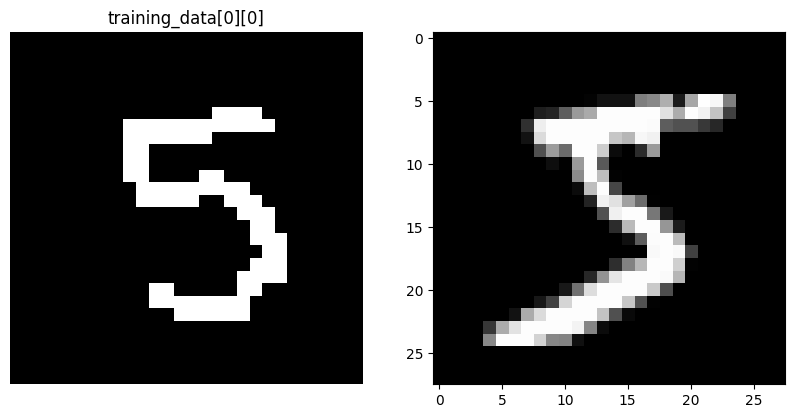

[[6.06645830e-04]
 [4.05309711e-06]
 [6.94873953e-09]
 [8.08352666e-03]
 [2.76131753e-07]
 [5.31231514e-01]
 [2.72280468e-06]
 [3.14195692e-05]
 [3.62412207e-06]
 [1.38361941e-03]]


In [34]:

#### my code
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image_path = 'good5.png'
image = Image.open(image_path).convert('L')

#convert image to numpy array
image_array = np.array(image)

#assuming you have two images loades as

fig, axs = plt.subplots(1, 2, figsize=(10, 5))



axs[0].imshow(image_array, cmap='gray')
axs[0].set_title(image_path)
axs[0].axis('off')  #Hide axis for the figure

axs[1].imshow(np.reshape(training_data[0][0],(28,28)), cmap='gray' )
axs[0].set_title('training_data[0][0]')
axs[0].axis('off')

plt.show()
image_array= image_array/255.0
a0= net.feedforward(np.reshape(image_array,(784,1)))
print(a0)


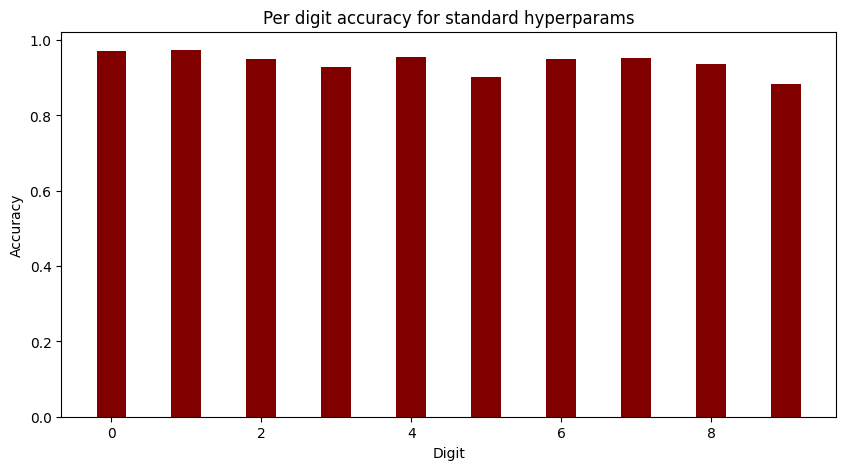

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(range(0,10), accuracies, color ='maroon',
        width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperparams")
plt.show()

In [35]:
# Initialize counters
good_correct = 0
good_total = 0
small_correct = 0
small_total = 0
large_correct = 0
large_total = 0

good_results = [0]*10
small_results = [0]*10
large_results = [0]*10

# Evaluate each image
for label, result in zip(labels, results):
    true_digit = int(label[-1])  # Assuming last character of label indicates the true digit
    predicted_digit = result

    if "good" in label:
        good_total += 1
        if true_digit == predicted_digit:
            good_correct += 1
            good_results[true_digit] = 1

    elif "small" in label:
        small_total += 1
        if true_digit == predicted_digit:
            small_correct += 1
            small_results[true_digit] = 1

    elif "big" in label:
        large_total += 1
        if true_digit == predicted_digit:
            large_correct += 1
            large_results[true_digit] = 1

# Print results
print(f"Good images correctly classified: {good_correct}/{good_total}")
print(f"Small images correctly classified: {small_correct}/{small_total}")
print(f"Large images correctly classified: {large_correct}/{large_total}")

# Print digit-wise results
print("Good images per digit classification (0=incorrect, 1=correct):", good_results)
print("Small images per digit classification (0=incorrect, 1=correct):", small_results)
print("Large images per digit classification (0=incorrect, 1=correct):", large_results)


Good images correctly classified: 0/0
Small images correctly classified: 0/0
Large images correctly classified: 0/0
Good images per digit classification (0=incorrect, 1=correct): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Small images per digit classification (0=incorrect, 1=correct): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Large images per digit classification (0=incorrect, 1=correct): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
